<a href="https://colab.research.google.com/github/user20and21/Account/blob/master/3_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import sklearn.datasets as datasets
data = datasets.load_digits()
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
len(data.images)

1797

In [ ]:
type(data.images)

numpy.ndarray

In [ ]:
data.images[0].shape

(8, 8)

In [ ]:
data.images

In [ ]:
data.target[0]

In [ ]:
data.images[0].dtype

In [ ]:
import numpy as np
np.max(data.images)

16.0

In [ ]:
#How do I convert this to 255 values?
(data.images[0]/16 * 255).astype(np.uint8)

In [ ]:
from PIL import Image

Image.fromarray((data.images[0]/16 * 255).astype(np.uint8))

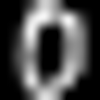

In [ ]:
Image.fromarray((data.images[0]/16 * 255).astype(np.uint8)).resize((100, 100))

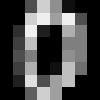

In [ ]:
Image.fromarray((data.images[0]/16 * 255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)

8


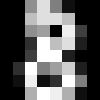

In [ ]:
i = 8
print(data.target[i])
Image.fromarray((data.images[i]/16 * 255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)

In [30]:
#Train a model
#Perform a data split into train and test
#Train a SVM Classifier
#Evaluate the classifier

data.images.shape

(1797, 8, 8)

In [42]:
from sklearn.model_selection import train_test_split
#SVM is expecting a flat image and not an 2D 8x 8 array
#We want to keep the quantity the same but combine the two 8 x 8 into a 1D array

flat_data = data.images.reshape(len(data.images), -1)
x_train, x_test, y_train, y_test = train_test_split(flat_data, data.target, train_size = 0.8)
x_test.shape

(360, 64)

6


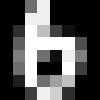

In [55]:
#Image.fromarray((data.images[i]/16 * 255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)
print(y_train[100])
Image.fromarray((x_train[100].reshape((8,8))/16 *255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)

2


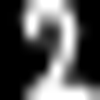

In [59]:
print(y_test[100])
Image.fromarray((x_test[100].reshape((8,8))/16*255).astype(np.uint8)).resize((100, 100))

In [ ]:
from sklearn import svm
model = svm.SVC(gamma = 0.001)
model.fit(x_train, y_train)

In [66]:
model.predict(x_train[5:6]) #expects a list rather than one image

array([8])

In [ ]:
y_train[5]

In [70]:
model.predict(x_train[:10])

array([1, 0, 3, 4, 4, 8, 8, 7, 4, 1])

In [71]:
model.predict(x_test[:10])

array([1, 6, 6, 0, 1, 6, 5, 8, 5, 5])

In [72]:
y_test[:10]

array([1, 6, 6, 0, 1, 6, 5, 8, 5, 5])

In [74]:
from sklearn import metrics

#How do we prdict all the outcomes for the testing data and save it into a single variable name
predicted = model.predict(x_test) #Feed the whole list into model.predict and save it under a variable name

#How do we find out how accurate our predictions were?
#We call classification_report from model and feed it y_test and the predicted values

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        39
           1       0.92      1.00      0.96        36
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00        32
           4       0.98      1.00      0.99        40
           5       1.00      0.97      0.99        37
           6       0.98      1.00      0.99        44
           7       1.00      1.00      1.00        31
           8       1.00      0.92      0.96        37
           9       1.00      1.00      1.00        27

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



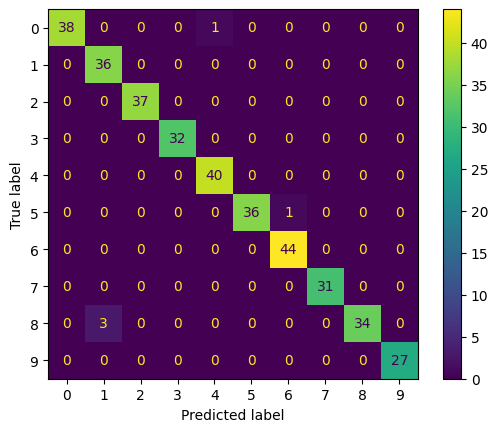

In [75]:
#How do you assess accuracy with a confusion matrix
#WE call ConfusionMatrixDisplay from metrics and then call from_predictions to which we feed y_test and predicted
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)

In [76]:
#Save the model to disk to be reloaded at a later time in another process for evaluation or inference
import pickle
with open("model.pkl", "wb") as fio:
  pickle.dump(model, fio)

In [79]:
#How do we open the model again - somewhere else maybe?
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [80]:
#How do we use this model: You can use it in place of model
mymodel.predict(x_test[:10])

array([1, 6, 6, 0, 1, 6, 5, 8, 5, 5])

In [81]:
y_test[:10]

array([1, 6, 6, 0, 1, 6, 5, 8, 5, 5])

In [87]:
image6 = Image.open("Digit_6.png").resize((8,8))

In [90]:
#convert the image into a numpy array
np_image6 = np.array(image6)
np_image6

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   1,  16,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1,   1,   0,   0,   0],
       [  0,   0, 186,   0,   0, 176,   0,   0],
       [  0,   0,   0,   1,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [92]:
#The model expects values up to 16 in floats
#How do we convert it to float32 and give it values up to 16
pre_processed6 = np_image6.astype(np.float32)/255 * 16

In [105]:
pre_processed6.flatten()[None].shape

(1, 64)

In [106]:
#The model expects the image to be 1D and not 2D so we need to flatten it
pre_processed6.flatten()[None]

array([[ 0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.0627451,  1.0039216,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.0627451,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.0627451,  0.0627451,  0.0627451,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       , 11.6705885,
         0.       ,  0.       , 11.043138 ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.0627451,  0.0627451,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ,  0.       ,
         0.       ,  0.       ,  0.       ,  0.       ]], dtype=float32)

In [104]:
pre_processed6.reshape(len(pre_processed6), -1).shape

(8, 8)

In [110]:
#How do we get the model to predict this image?
model.predict(pre_processed6.flatten()[None])

array([1])

In [ ]:
#image6 = Image.open("Digit_6.png").resize((8,8))

image5 = Image.open("Digit_5.png").resize((8, 8))
image5

In [ ]:
#How do I convert it into an array?
np_image5 = np.array(image5)
np_image5

In [117]:
#How do you convert it into float32 and 16 values?
image5_in16 = np_image5.astype(np.float32)/255 *16

In [125]:
#How do we flatten it?
image5_final = image5_in16.flatten()[None]
image5_final.shape


(1, 64)

In [126]:
model.predict(image5_final)

array([1])

In [127]:
y_test[0:10]

array([1, 6, 6, 0, 1, 6, 5, 8, 5, 5])

In [139]:
#How do we find where the image '1'is saved?
np.where(y_test == 9)

(array([ 17,  34,  44,  45,  49,  78,  81, 103, 104, 107, 114, 118, 215,
        243, 252, 261, 264, 267, 280, 286, 300, 312, 326, 331, 344, 346,
        356]),)

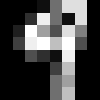

In [142]:
Image.fromarray((x_test[44].reshape((8,8))/16 *255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)

In [155]:

image9 = Image.open("Digit_9.png").resize((8,8))
np_image9 = np.array(image9)
np_in16 = np_image9.astype(np.float32)/255 *16
np_final = np_in16.flatten()[None]
np_final.shape

(1, 64)

In [156]:
model.predict(np_final)

array([1])